## Question E
* Introduce some additional connections, e.g., 30% more links, to simulate a period of more active social activities. Compare the infection increase rate with those in part b without these additional connections. 
* Question B :
Suppose an effective vaccine is introduced at  round and it protects each vaccinated individual with a  chance. Simulate and demonstrate how two communities would see infection spread with different vaccination rates (rate of population that will take the vaccine), e.g., v1 = 0.5 and v2 = 0.85   

### We add 30% to the current value of p to add 30% additional links

In [1]:
import networkx 
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload

In [2]:
def simulator(rounds, N, gamma, beta, adj_matrix,v,theta):
    infected = np.zeros((N,),dtype=int) # Array of Healthy people
    infected[1]=1 # 1st person in the Array of healthy people gets infected
    total_infected = np.zeros(rounds) # Array to monitor the total number of infected people in each round
    sick = 1
    healthy= N - sick
    for i in range(rounds):
        if(i==2):                       
            for person in range(int(N*v*theta)):
                immunePerson = random.randint(0,N-1)
                if(infected[immunePerson]==1):
                    sick = sick -1;
                    healthy=healthy+1
                
                infected[immunePerson] = -1
            immunePerson_index = np.where(infected==-1)       
        infected_index_list = np.where(infected==1)   #To find the index of the people who are infected
        
        for index in infected_index_list:    #To Check if the peorson who is infected is still infectious at each round 
            prob_array = np.asarray(adj_matrix[index]) * np.random.rand(N) #get row in adj matrix of infected person and assign rand nums to their connections
            new_infected_indices = np.where((prob_array <= (beta*gamma)) & (prob_array != 0))[1] #find indices that match these conditions, they become infected
            for j in new_infected_indices:
                if(infected[j]==0):                    # if the person is healthy and his prob<=infectionrate infect the person
                    infected[j] = 1
                    sick = sick+1
                    healthy=healthy-1
        #print("number of infected people in round ",i,"is ",sick)
        #print("number of people healthy in round ",i,"is",healthy)
        total_infected[i]= np.sum(np.where(infected>0,infected,0))    
    return total_infected

In [3]:
rounds = 1000
N = 1000                        # Total population 
p = 0.02                         # Probability of connection between 2 people in population
gamma = .05                     # Probabilty of contact with a infected person connection
beta = .05                      # Probability of infection given contact with an infected person
V1 = 0.5                       # Portion of population vaccinated for community 1
V2 = 0.85                        # Portion of population vaccinated for community 2
theta = 0.4                     # Vaccination protection rate

In [4]:
#Generate G(n,p)
G_active = networkx.binomial_graph(N, p)
adj_matrix_active = networkx.linalg.graphmatrix.adjacency_matrix(G_active).todense()
total_infected = simulator(rounds, N, gamma, beta, adj_matrix_active,V1,theta)

In [5]:
df_infected = pd.DataFrame(data=total_infected)
df_infected = df_infected.rename(columns={0:'infected'})
df_infected = df_infected.reset_index()
df_infected = df_infected.rename(columns={'index':'rounds'})
df_infected['P'] = p

### 30 % increase in the connections to a population with a vaccination rate of 0.5

In [6]:
p=p+(p*0.3)
p= round(p,3)
#Generate G(n,p)
G = networkx.binomial_graph(N, p)
adj_matrix_active = networkx.linalg.graphmatrix.adjacency_matrix(G).todense()
total_infected = simulator(rounds, N, gamma, beta, adj_matrix_active,V1,theta)

In [7]:
df_infected_new = pd.DataFrame(data=total_infected)
df_infected_new = df_infected_new.rename(columns={0:'infected'})
df_infected_new = df_infected_new.reset_index()
df_infected_new = df_infected_new.rename(columns={'index':'rounds'})
df_infected_new['P'] = p
df_infected = df_infected.append(df_infected_new)
#df_infected

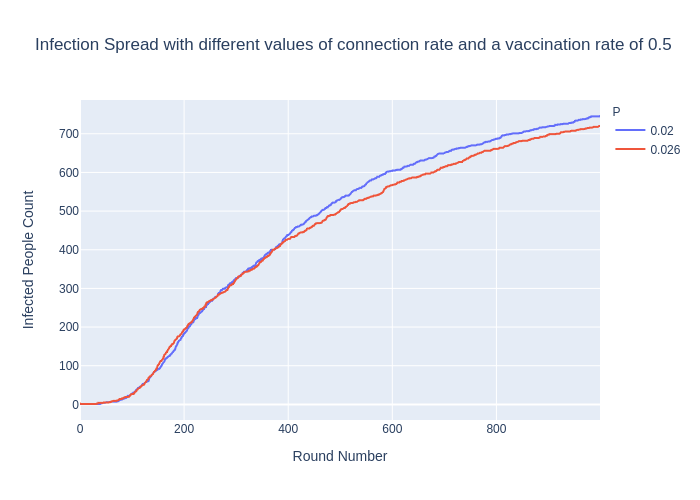

In [8]:
fig = px.line(df_infected, x="rounds", y="infected",color="P",title="Infection Spread with different values of connection rate and a vaccination rate of 0.5")
fig.update_layout(
    xaxis_title="Round Number",
    yaxis_title="Infected People Count")
fig.write_image("../images/infectionSpreadWithConnectionrateV1.png")
Image(filename="../images/infectionSpreadWithConnectionrateV1.png")
#fig.show()

In [9]:
p=0.02
#Generate G(n,p)
G_active = networkx.binomial_graph(N, p)
adj_matrix_active = networkx.linalg.graphmatrix.adjacency_matrix(G_active).todense()
total_infected = simulator(rounds, N, gamma, beta, adj_matrix_active,V2,theta)
df_infected = pd.DataFrame(data=total_infected)
df_infected = df_infected.rename(columns={0:'infected'})
df_infected = df_infected.reset_index()
df_infected = df_infected.rename(columns={'index':'rounds'})
df_infected['P'] = p

### 30 % increase in the connections to a population with a V2 vaccination rate of 0.85

In [10]:
p=p+(p*0.3)
p=round(p,3)
#Generate G(n,p)
G_active = networkx.binomial_graph(N, p)
adj_matrix_active = networkx.linalg.graphmatrix.adjacency_matrix(G_active).todense()
total_infected = simulator(rounds, N, gamma, beta, adj_matrix_active,V2,theta)
df_infected_new = pd.DataFrame(data=total_infected)
df_infected_new = df_infected_new.rename(columns={0:'infected'})
df_infected_new = df_infected_new.reset_index()
df_infected_new = df_infected_new.rename(columns={'index':'rounds'})
df_infected_new['P'] = p
df_infected = df_infected.append(df_infected_new)

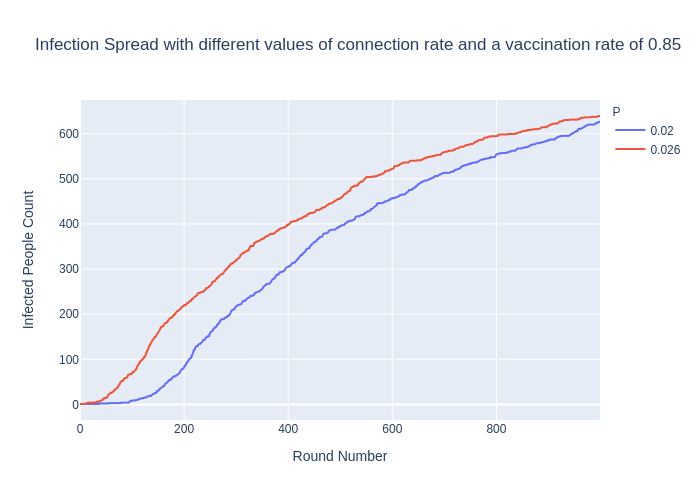

In [11]:
fig = px.line(df_infected, x="rounds", y="infected",color="P",title="Infection Spread with different values of connection rate and a vaccination rate of 0.85")
fig.update_layout(
    xaxis_title="Round Number",
    yaxis_title="Infected People Count")
  
fig.write_image("../images/infectionSpreadWithConnectionrateV2.png")
Image(filename="../images/infectionSpreadWithConnectionrateV2.png")
#fig.show()